![Python](https://img.shields.io/badge/python-3.9-blue)
![Status: Pending Migration](https://img.shields.io/badge/status-pending%20migration-orange)

<a id="table-of-contents"></a>
# 📖 Table of Contents

[🧭 Objective](#objective)  
- [🧠 What is Clustering?](#what-is-clustering)  
- [📌 When is Clustering Useful?](#clustering-use-cases)  
- [📏 Evaluation Challenges](#evaluation-challenges)

[📦 Data Setup](#data-setup)  
- [📥 Load Dataset](#load-dataset)  
- [🧹 Preprocessing](#preprocessing)

[📊 Clustering Algorithms](#clustering-algos)

[📈 KMeans](#kmeans)  
- [⚙️ KMeans Config](#kmeans-config)  
- [📉 K Selection: Elbow + Silhouette](#kmeans-k-selection)  
- [🚀 Run KMeans](#kmeans-run)  
- [📊 Visualize Clusters (PCA-backed)](#kmeans-visual)  
- [📌 Cluster Summary](#kmeans-summary)


[🧱 Hierarchical Clustering](#hierarchical)  
- [🌳 Dendrograms](#dendrograms)  
- [📏 Linkage Types](#linkage)  
- [📊 Cluster Cuts](#cluster-cuts)

[🌐 DBSCAN](#dbscan)  
- [🔍 Intuition](#dbscan-intuition)  
- [⚙️ Epsilon, MinPts](#dbscan-params)  
- [📊 Visual Output](#dbscan-visuals)

[🎲 Gaussian Mixture Models (GMM)](#gmm)  
- [🧠 Soft Clustering](#soft-clustering)  
- [📈 BIC / AIC for Model Selection](#gmm-eval)

[📍 Mean Shift](#meanshift)  
- [📏 Bandwidth Selection](#bandwidth)

[🎼 Spectral Clustering](#spectral)  
- [🔗 Graph Representation](#spectral-graph)  
- [📊 Laplacian & Eigenvectors](#spectral-laplacian)

[📡 OPTICS](#optics)  
- [🪜 Reachability Plot](#reachability)

[🌲 BIRCH](#birch)

[🔥 HDBSCAN](#hdbscan)

[🧬 Other Methods](#other-methods)  
- [🧿 Affinity Propagation](#affinity-prop)  
- [🧊 Ward’s Method](#ward)

[📌 Summary Table](#summary-table)  
- [📋 Comparison Across Methods](#method-comparison)  
- [🧭 Practical Recommendations](#recommendations)

[❓ FAQ / Notes](#faq)  
- [📏 Choosing Number of Clusters](#choose-k)  
- [📊 Distance Metrics](#distance-metrics)  
- [⚠️ Common Pitfalls](#pitfalls)

___

<a id="objective"></a>
# 🧭 Objective

<a id="what-is-clustering"></a>
#### 🧠 What is Clustering?

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧠 What is Clustering?

Clustering is an unsupervised learning technique that groups similar data points together without predefined labels.

- The goal is to **identify natural groupings** in data based on similarity or distance
- Each group is called a **cluster**, and the points within a cluster are more similar to each other than to points in other clusters
- Used to uncover structure in data when no labels are available

##### Types of Clustering

- **Hard Clustering**: Each point belongs to one cluster (e.g., KMeans)
- **Soft Clustering**: Points can belong to multiple clusters with probabilities (e.g., GMM)
- **Hierarchical Clustering**: Builds a tree-like structure of nested clusters
- **Density-Based Clustering**: Forms clusters based on dense regions (e.g., DBSCAN)

</details>


<a id="clustering-use-cases"></a>
#### 📌 When is Clustering Useful?

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 📌 When is Clustering Useful?

Clustering is helpful when you want to discover structure or patterns in unlabeled data.

##### Common Applications

- **Customer Segmentation**: Group users based on behavior or demographics
- **Market Research**: Identify distinct buyer personas
- **Anomaly Detection**: Spot outliers as points that don’t belong to any cluster
- **Recommender Systems**: Group similar items or users
- **Document Clustering**: Group similar news articles, reports, etc.
- **Genetics & Bioinformatics**: Group similar gene expressions or cell types

##### Key Benefit

Clustering helps reduce complexity by summarizing large datasets into **meaningful groups**, even when labels are unavailable.

</details>


<a id="evaluation-challenges"></a>
#### 📏 Evaluation Challenges

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 📏 Evaluation Challenges

Clustering is difficult to evaluate because it’s unsupervised — there’s no ground truth.

##### Internal Evaluation

- **Silhouette Score**: Measures how well a point fits within its cluster vs. others
- **Davies-Bouldin Index**: Lower values = better cluster separation
- **Calinski-Harabasz Index**: Ratio of between- to within-cluster dispersion

##### External Evaluation (when ground truth is available)

- **Adjusted Rand Index (ARI)**: Measures similarity to true labels
- **Normalized Mutual Information (NMI)**: Captures mutual information between assignments and labels

##### Other Challenges

- **Choosing the Number of Clusters** (K)
- **Handling High-Dimensionality**: PCA/t-SNE often needed
- **Scale Sensitivity**: Many algorithms need feature normalization
- **Irregular Cluster Shapes**: Some methods fail on non-spherical clusters

</details>


[Back to the top](#table-of-contents)
___



<a id="data-setup"></a>
# 📦 Data Setup

<a id="load-dataset"></a>
#### 📥 Load Dataset

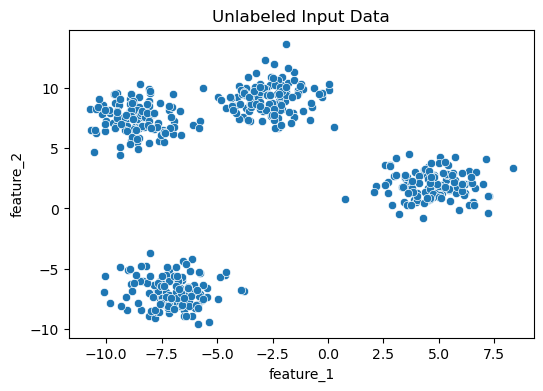

In [23]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic clusterable data
X, y = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)
df = pd.DataFrame(X, columns=["feature_1", "feature_2"])

# Plot raw input
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="feature_1", y="feature_2")
plt.title("Unlabeled Input Data")
plt.show()

<a id="preprocessing"></a>
#### 🧹 Preprocessing

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧹 Preprocessing

Clustering algorithms like KMeans, DBSCAN, and GMM are sensitive to feature scale.

- We apply **StandardScaler** to normalize all features to zero mean and unit variance
- This ensures that distance-based calculations treat each feature equally
- Additional steps like missing value imputation or encoding are skipped here as all features are numeric and clean

</details>


In [24]:
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Preview
df_scaled.head()


,feature_1,feature_2
0,-0.766161,0.562117
1,-1.266310,-1.545187
2,2.006315,-0.297524
3,0.077145,0.684294
4,-0.385682,-1.611826


[Back to the top](#table-of-contents)
___



<a id="clustering-algos"></a>
# 📊 Clustering Algorithms

##### 📊 Comparison

| Algorithm           | Works Well For               | Assumes Shape       | Needs Scaling | Handles Outliers | Notes |
|---------------------|------------------------------|----------------------|---------------|------------------|-------|
| **KMeans**          | Spherical, equal-size blobs  | Spherical            | ✅ Yes         | ❌ No             | Fast, interpretable |
| **Hierarchical**    | Any size, low dims           | Flexible (linkage)   | 🟡 Sometimes   | ❌ No             | Good for visualizing nested groups |
| **DBSCAN**          | Irregular, density-based     | Arbitrary            | ✅ Yes         | ✅ Yes            | Needs `eps` tuning |
| **GMM**             | Elliptical, probabilistic    | Gaussian blobs       | ✅ Yes         | ❌ No             | Soft assignments |
| **Mean Shift**      | Smooth cluster shapes        | Arbitrary            | ✅ Yes         | ❌ No             | Bandwidth sensitive |
| **Spectral**        | Graph-connected data         | Graph-based          | ✅ Yes         | ❌ No             | Slow for large N |
| **OPTICS**          | Nested, variable density     | Arbitrary            | 🟡 Sometimes   | ✅ Yes            | Better than DBSCAN for chaining |
| **BIRCH**           | Large data, streaming        | Spherical-ish        | 🟡 Sometimes   | ❌ No             | Memory-efficient |
| **HDBSCAN**         | Hierarchical + density       | Arbitrary            | 🟡 Sometimes   | ✅ Yes            | Adaptive to density |
| **Affinity Prop.**  | Message-passing structure    | N/A (similarity)     | ✅ Yes         | ❌ No             | No need to set K |

##### 🖼️ Visual Comparison

This image from scikit-learn shows how different algorithms behave on varied shapes and densities:
<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png" alt="clustering comparison" width="900"/>

[Back to the top](#table-of-contents)
___



<a id="kmeans"></a>
# 📈 KMeans

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 📈 What is KMeans?

KMeans is a **partitioning-based clustering algorithm** that groups data into `K` clusters by minimizing the **sum of squared distances (inertia)** within clusters.

##### ⚙️ How It Works

1. **Initialize** `K` centroids (randomly or via KMeans++)  
2. **Assign** each point to the nearest centroid  
3. **Update** centroids as the mean of all assigned points  
4. **Repeat** steps 2–3 until convergence

##### ✅ When to Use

- Clusters are **compact, well-separated**, and roughly spherical
- **Scalability** matters — KMeans is fast and efficient
- Applications like customer segmentation, image compression, etc.

##### ⚠️ Limitations

- Requires choosing `K` in advance  
- Sensitive to **initial centroids**, **outliers**, and **feature scaling**  
- Assumes clusters are **convex and isotropic**

##### 🧠 Variants

- **KMeans++**: Better centroid initialization  
- **MiniBatch KMeans**: Faster for large datasets  
- **Fuzzy C-Means**: Soft assignment to multiple clusters

</details>


<a id="kmeans-config"></a>
#### ⚙️ KMeans Config


In [25]:
# 📈 KMeans — ⚙️ Config
from sklearn.preprocessing import StandardScaler

# === CONFIG ===
k_range = range(2, 10)       # Range of K values to evaluate
k_final = 4                  # Final K to use when fitting the model
random_state = 42            # Seed for reproducibility
use_scaled_data = True       # Whether to scale before clustering
scaler = StandardScaler()    # Scaler object

# Prepare input data
df_input = df.copy()
if use_scaled_data:
    df_input = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Preview
df_input.head()


,feature_1,feature_2
0,-0.766161,0.562117
1,-1.266310,-1.545187
2,2.006315,-0.297524
3,0.077145,0.684294
4,-0.385682,-1.611826


<a id="kmeans-k-selection"></a>
#### 📉 K Selection: Elbow + Silhouette


<details><summary><strong>📖 Click to Expand</strong></summary>

##### 📉 K Selection Using Elbow + Silhouette

Choosing the right number of clusters (K) is critical to effective clustering.

##### 🔹 Elbow Method

- Plots **inertia** (within-cluster sum of squares) vs. K
- Look for a point where the drop in inertia slows significantly — the "elbow"
- Simple and fast, but subjective

##### 🔹 Silhouette Score

- Measures **how well each point fits** within its cluster vs. the next best
- Values range from -1 to 1:
  - Closer to 1 → well-clustered
  - Around 0 → overlapping clusters
  - Negative → likely misclassified
- Useful for identifying over-clustering or under-clustering

##### 🔁 Best Practice

Use both methods together:
- Elbow narrows the K range
- Silhouette refines the choice based on structure quality

</details>


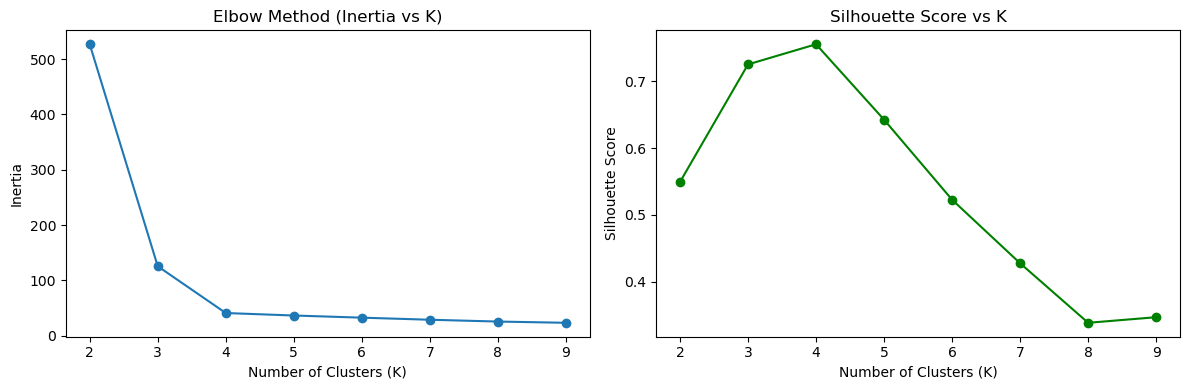

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertias = []
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    labels = kmeans.fit_predict(df_input)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(df_input, labels))

# Plot Elbow and Silhouette Score
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Elbow plot
ax[0].plot(list(k_range), inertias, marker='o')
ax[0].set_title("Elbow Method (Inertia vs K)")
ax[0].set_xlabel("Number of Clusters (K)")
ax[0].set_ylabel("Inertia")

# Silhouette plot
ax[1].plot(list(k_range), silhouettes, marker='o', color='green')
ax[1].set_title("Silhouette Score vs K")
ax[1].set_xlabel("Number of Clusters (K)")
ax[1].set_ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


<a id="kmeans-run"></a>
#### 🚀 Run KMeans


In [27]:
# Fit KMeans using the selected final K
kmeans_final = KMeans(n_clusters=k_final, n_init=10, random_state=random_state)
labels_final = kmeans_final.fit_predict(df_input)

# Append cluster assignments to the data
df_kmeans = df_input.copy()
df_kmeans["cluster"] = labels_final
df_kmeans.head()

,feature_1,feature_2,cluster
0,-0.766161,0.562117,1
1,-1.266310,-1.545187,2
2,2.006315,-0.297524,0
3,0.077145,0.684294,3
4,-0.385682,-1.611826,2


In [28]:
# Show cluster counts
print(df_kmeans["cluster"].value_counts().sort_index())

0    125
1    125
2    125
3    125
Name: cluster, dtype: int64


<a id="kmeans-visual"></a>
#### 📊 Visualize Clusters


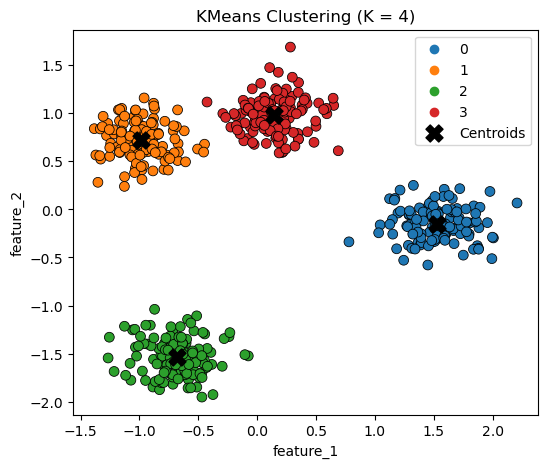

In [29]:
def plot_clusters_2d(df, label_col="cluster", centroids=None, title="Cluster Visualization (2D)", hue_palette="tab10"):
    """
    Plots a 2D scatterplot of clusters with optional centroids.

    Parameters:
        df (pd.DataFrame): DataFrame with exactly 2 feature columns and a cluster label column.
        label_col (str): Name of the column containing cluster labels.
        centroids (ndarray or list): Optional array of centroid coordinates (shape: [K, 2]).
        title (str): Plot title.
        hue_palette (str): Color palette for clusters.
    """
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x=df.columns[0], y=df.columns[1], hue=label_col, palette=hue_palette, s=50, edgecolor="k")

    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=150, marker='X', label='Centroids')

    plt.title(title)
    plt.legend()
    plt.show()

plot_clusters_2d(df_kmeans, label_col="cluster", centroids=kmeans_final.cluster_centers_, title=f"KMeans Clustering (K = {k_final})")


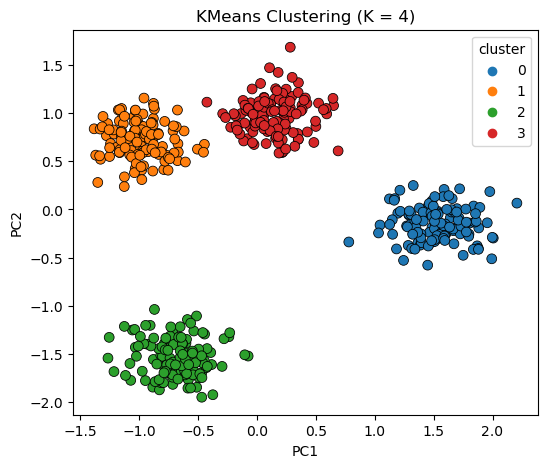

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def plot_clusters_pca(df_with_labels, label_col="cluster", title="Cluster Visualization (PCA-backed)"):
    """
    Plots clusters in 2D using PCA if necessary.

    Parameters:
        df_with_labels (pd.DataFrame): DataFrame with features + cluster label column.
        label_col (str): Name of the cluster label column.
        title (str): Plot title.
    """
    features = df_with_labels.drop(columns=[label_col])

    # Reduce to 2D if needed
    if features.shape[1] > 2:
        pca = PCA(n_components=2, random_state=42)
        reduced = pca.fit_transform(features)
        plot_df = pd.DataFrame(reduced, columns=["PC1", "PC2"])
    else:
        plot_df = features.copy()
        plot_df.columns = ["PC1", "PC2"]

    plot_df[label_col] = df_with_labels[label_col].values

    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=plot_df, x="PC1", y="PC2", hue=label_col, palette="tab10", s=50, edgecolor="k")
    plt.title(title)
    plt.show()
plot_clusters_pca(df_kmeans, label_col="cluster", title=f"KMeans Clustering (K = {k_final})")


<a id="kmeans-summary"></a>
#### 📌 Cluster Summary


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def summarize_clusters(df, label_col="cluster", summary_cols=None, cmap="Blues"):
    """
    Displays summary statistics for each cluster.

    Parameters:
        df (pd.DataFrame): DataFrame with features + cluster label.
        label_col (str): Column name containing cluster labels.
        summary_cols (list): List of columns to summarize. If None, all numeric features are used.
        cmap (str): Color map for background gradient.
    """
    if summary_cols is None:
        summary_cols = [col for col in df.select_dtypes(include="number").columns if col != label_col]

    summary = df.groupby(label_col).agg(
        count=(label_col, "size"),
        **{f"avg_{col}": (col, "mean") for col in summary_cols}
    ).reset_index()

    return summary.style.background_gradient(cmap=cmap, axis=0)
summarize_clusters(df_kmeans)


,cluster,count,avg_feature_1,avg_feature_2
0,0,125,1.530125,-0.154559
1,1,125,-0.990375,0.719419
2,2,125,-0.684463,-1.539546
3,3,125,0.144713,0.974686


[Back to the top](#table-of-contents)
___



<a id="hierarchical"></a>
# 🧱 Hierarchical Clustering

<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🧱 What is Hierarchical Clustering?

Hierarchical clustering builds a **nested tree of clusters** by either:
- **Agglomerative** (bottom-up): Merge closest clusters until one remains
- **Divisive** (top-down): Start with one big cluster and recursively split

It does **not require you to predefine the number of clusters** — instead, you choose where to “cut” the tree.

##### 🔹 Distance Between Clusters (Linkage Types)

- **Single linkage**: Minimum distance between points in two clusters  
- **Complete linkage**: Maximum distance  
- **Average linkage**: Mean pairwise distance  
- **Ward linkage**: Minimizes increase in total variance (best for compact clusters)

##### ✅ When to Use

- You want a **visual tree** of how data groups form
- You’re unsure how many clusters to choose — let the tree reveal it
- You want interpretable cluster evolution (e.g., customer groups merging)

##### ⚠️ Limitations

- Memory and time intensive for large datasets
- Sensitive to scale and noise
- Tree depth can be misleading without proper distance normalization

</details>


<a id="hierarchical-config"></a>
#### ⚙️ Hierarchical Config


In [32]:
from sklearn.preprocessing import StandardScaler

# === CONFIG ===
hierarchical_metric = "euclidean"      # Distance metric (euclidean, manhattan, etc.)
hierarchical_linkage = "ward"          # Linkage: ward, single, complete, average
n_clusters_hierarchical = 4            # Number of clusters to cut the tree at
use_scaled_data_hierarchical = True    # Whether to scale features

# Prepare data
df_input_hier = df.copy()
if use_scaled_data_hierarchical:
    scaler_hier = StandardScaler()
    df_input_hier = pd.DataFrame(scaler_hier.fit_transform(df), columns=df.columns)

df_input_hier.head()


,feature_1,feature_2
0,-0.766161,0.562117
1,-1.266310,-1.545187
2,2.006315,-0.297524
3,0.077145,0.684294
4,-0.385682,-1.611826


<a id="hierarchical-dendrogram"></a>
#### 🌳 Plot Dendrogram


<details><summary><strong>📖 Click to Expand</strong></summary>

##### 🌳 What is a Dendrogram?

A dendrogram is a **tree diagram** that shows how points are merged into clusters during agglomerative clustering.

- **X-axis**: data points or their indexes  
- **Y-axis**: distance between merged clusters  
- You can “cut” the tree at any height to form flat clusters

##### 🔍 Why It’s Useful

- Visualizes the **entire clustering process**, not just final clusters
- Helps choose the **optimal number of clusters** based on vertical gaps
- Useful when you don’t know how many clusters to use up front

</details>


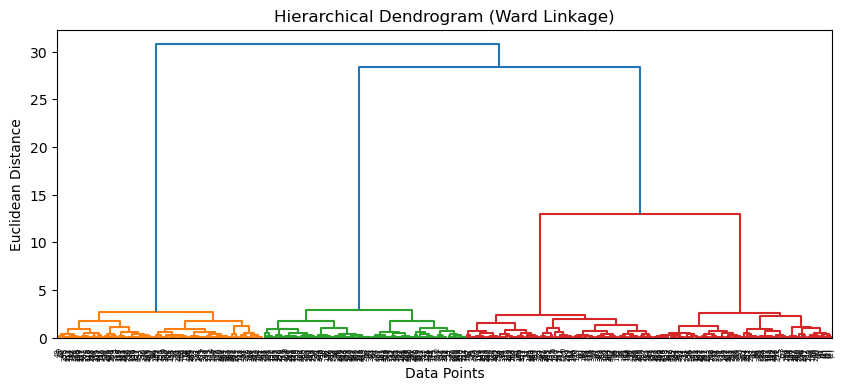

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute linkage matrix
linkage_matrix = linkage(df_input_hier, method=hierarchical_linkage, metric=hierarchical_metric)

# Plot dendrogram
plt.figure(figsize=(10, 4))
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.title(f"Hierarchical Dendrogram ({hierarchical_linkage.title()} Linkage)")
plt.xlabel("Data Points")
plt.ylabel(f"{hierarchical_metric.title()} Distance")
plt.show()


<a id="hierarchical-cut"></a>
#### ✂️ Choose Clusters from Tree


<details><summary><strong>📖 Click to Expand</strong></summary>

##### ✂️ Cutting the Dendrogram into Flat Clusters

Once the hierarchical tree (dendrogram) is built, we **flatten it into K clusters** using a cutting rule.

##### 🔧 How It Works

- The dendrogram represents how clusters were merged based on distance
- We choose a number `K`, and cut the tree **horizontally** to extract K flat clusters
- Internally, this is done using:
  - `criterion='maxclust'`: Find the highest level where `K` clusters exist
  - `t=K`: The number of clusters to form

##### 🧠 Key Benefit

- Lets you **defer the choice of K** until after seeing the full tree
- Supports exploratory workflows (e.g., try K = 3, 4, 5 and compare)

##### ⚠️ Notes

- If clusters are very unbalanced or chaining happens, some clusters may be very small
- A good “cut height” usually corresponds to **large vertical gaps** in the dendrogram

</details>


In [ ]:
# Recompute linkage_matrix if not already defined
from scipy.cluster.hierarchy import linkage, fcluster

linkage_matrix = linkage(df_input_hier, method=hierarchical_linkage, metric=hierarchical_metric)

# Cut the tree
labels_hier = fcluster(linkage_matrix, t=n_clusters_hierarchical, criterion='maxclust')

# Add to dataframe
df_hier = df_input_hier.copy()
df_hier["cluster"] = labels_hier

# Cluster counts
df_hier["cluster"].value_counts().sort_index()

1    125
2    125
3    126
4    124
Name: cluster, dtype: int64

<a id="hierarchical-visual"></a>
#### 📊 Visualize Clusters (PCA-backed)


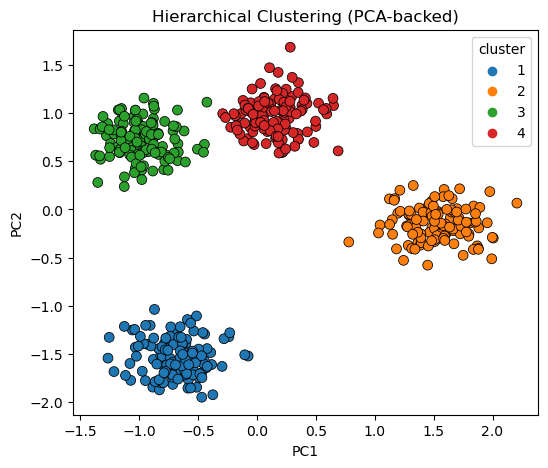

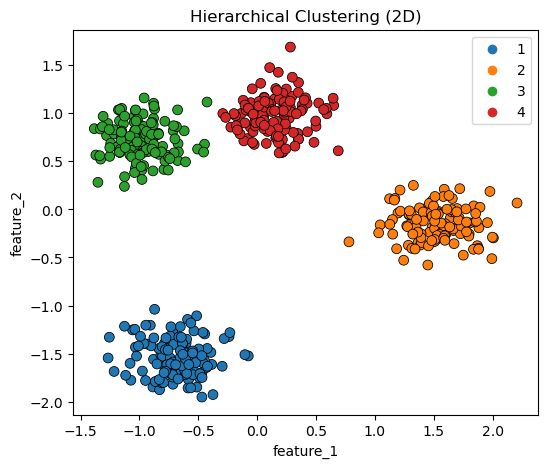

In [ ]:
plot_clusters_pca(df_hier, label_col="cluster", title="Hierarchical Clustering (PCA-backed)")
plot_clusters_2d(df_hier, label_col="cluster", title="Hierarchical Clustering (2D)")

<a id="hierarchical-summary"></a>
#### 📌 Cluster Summary


In [ ]:
summarize_clusters(df_hier)

,cluster,count,avg_feature_1,avg_feature_2
0,1,125,-0.684463,-1.539546
1,2,125,1.530125,-0.154559
2,3,126,-0.985897,0.722557
3,4,124,0.149316,0.973557


[Back to the top](#table-of-contents)
___



<a id="dbscan"></a>
# 🌐 DBSCAN

<a id="dbscan-intuition"></a>
#### 🔍 Intuition

<a id="dbscan-params"></a>
#### ⚙️ Epsilon, MinPts

<a id="dbscan-visuals"></a>
#### 📊 Visual Output

[Back to the top](#table-of-contents)
___



<a id="gmm"></a>
# 🎲 Gaussian Mixture Models (GMM)

<a id="soft-clustering"></a>
#### 🧠 Soft Clustering

<a id="gmm-eval"></a>
#### 📈 BIC / AIC for Model Selection

[Back to the top](#table-of-contents)
___



<a id="meanshift"></a>
# 📍 Mean Shift

<a id="bandwidth"></a>
#### 📏 Bandwidth Selection

[Back to the top](#table-of-contents)
___



<a id="spectral"></a>
# 🎼 Spectral Clustering

<a id="spectral-graph"></a>
#### 🔗 Graph Representation

<a id="spectral-laplacian"></a>
#### 📊 Laplacian & Eigenvectors

[Back to the top](#table-of-contents)
___



<a id="optics"></a>
# 📡 OPTICS

<a id="reachability"></a>
#### 🪜 Reachability Plot

[Back to the top](#table-of-contents)
___



<a id="birch"></a>
# 🌲 BIRCH

[Back to the top](#table-of-contents)
___



<a id="hdbscan"></a>
# 🔥 HDBSCAN

[Back to the top](#table-of-contents)
___



<a id="other-methods"></a>
# 🧬 Other Methods

<a id="affinity-prop"></a>
#### 🧿 Affinity Propagation

<a id="ward"></a>
#### 🧊 Ward’s Method

[Back to the top](#table-of-contents)
___



<a id="summary-table"></a>
# 📌 Summary Table

<a id="method-comparison"></a>
#### 📋 Comparison Across Methods

<a id="recommendations"></a>
#### 🧭 Practical Recommendations

[Back to the top](#table-of-contents)
___



<a id="faq"></a>
# ❓ FAQ / Notes

<a id="choose-k"></a>
#### 📏 Choosing Number of Clusters

<a id="distance-metrics"></a>
#### 📊 Distance Metrics

<a id="pitfalls"></a>
#### ⚠️ Common Pitfalls

[Back to the top](#table-of-contents)
___

